In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import rc
from matplotlib import animation
from matplotlib import colors
from matplotlib.patches import Rectangle
import matplotlib.projections as proj
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d.axis3d import Axis
import matplotlib.colors as mcolors
import seaborn as sns

import re
import os
import glob
import datetime
%matplotlib inline

In [ ]:
rc('font', size=8)
rc('font', family='Arial')
rc('axes', linewidth=1)
rc('xtick.major', width=0.5, size=1.5)
rc('ytick.major', width=0.5, size=1.5)

rc('mathtext', default='regular')

# Figure 4

In [3]:
# define function for plotting bounds
def plot_bounds(ax, xs, ys, zs):
    lw = 1
    color = 'k'
    style = '-'
        
    ax.plot((xs[0],xs[1]),(ys[0],ys[1]),(zs[0],zs[0]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[1],xs[2]),(ys[1],ys[2]),(zs[0],zs[0]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[2],xs[3]),(ys[2],ys[3]),(zs[0],zs[0]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[3],xs[0]),(ys[3],ys[0]),(zs[0],zs[0]),linestyle=style,c=color,lw=lw)

    ax.plot((xs[0],xs[1]),(ys[0],ys[1]),(zs[1],zs[1]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[1],xs[2]),(ys[1],ys[2]),(zs[1],zs[1]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[2],xs[3]),(ys[2],ys[3]),(zs[1],zs[1]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[3],xs[0]),(ys[3],ys[0]),(zs[1],zs[1]),linestyle=style,c=color,lw=lw)

    ax.plot((xs[0],xs[0]),(ys[0],ys[0]),(zs[0],zs[1]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[1],xs[1]),(ys[1],ys[1]),(zs[0],zs[1]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[2],xs[2]),(ys[2],ys[2]),(zs[0],zs[1]),linestyle=style,c=color,lw=lw)
    ax.plot((xs[3],xs[3]),(ys[3],ys[3]),(zs[0],zs[1]),linestyle=style,c=color,lw=lw)

In [4]:
def annotate_best(ax, df, best_ind, offset=(-100, 100)):
        
        annotation = 'best value: {:.3f}\n'.format(df.ix[best_ind, 3])
        annotation += '{:.1f} uL/min\n'.format(df.ix[best_ind, 0])
        annotation += '{:.1f} uL/min\n'.format(df.ix[best_ind, 1])
        annotation += '{:.1f}$^\circ$C'.format(df.ix[best_ind, 2])
        
        x2, y2, _ = proj3d.proj_transform(df.ix[best_ind, 0], df.ix[best_ind, 1],
                                          df.ix[best_ind, 2], ax.get_proj())
        
        ax.annotate(annotation, xy=(x2,y2), xytext=offset, textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', ec='k', lw=2))

In [5]:
def shiftedColorMap(start=0, midpoint=0.5, stop=1.0, above_map=cm.Reds, below_map=cm.Blues_r, name='shiftedcmap'):
    # sample the colormaps that you want to use. Use 128 from each so we get 256
    # colors in total
    n_above = int((stop - midpoint) / (stop - start) * 256)
    n_below = 256 - n_above
    above_colors = above_map(np.linspace(0., 1, n_above))
    below_colors = below_map(np.linspace(0, 1, n_below))

    # combine them and build a new colormap
    colors = np.vstack((below_colors, above_colors))
    newmap = mcolors.LinearSegmentedColormap.from_list(name, colors)
    
    return newmap

In [6]:
df1 = pd.read_csv('../optimisations/run_I/runI.results.csv')
df1 = df1.drop(len(df1)-1, axis=0)
df1['med_dev'] = df1.f - df1.f.median()
df1['name'] = 'runI'

summary = pd.read_csv('../optimisations/optimisations.summary.csv', index_col=0)
summary = summary.loc['runI']

df2 = pd.read_csv('../optimisations/run_II/runII.results.csv')
df2 = df2.drop(len(df2)-1, axis=0)
df2['med_dev'] = df2.f - df2.f.median()
df2['name'] = 'runII'
offset = 240
df2.x1 += offset

In [7]:
df1

,x1,x2,x3,v1,v2,v3,f,med_dev,name
0,73.777013,139.862987,141.15,-0.179613,0.689161,141.15,0.383849,0.372430,runI
1,47.975387,29.864613,134.75,0.135097,0.251097,134.75,0.034224,0.022805,runI
2,146.751920,80.888080,115.85,0.168000,0.734323,115.85,0.006406,-0.005013,runI
3,21.782227,17.137773,147.50,0.069290,0.125548,147.50,0.072665,0.061246,runI
4,63.006720,44.513280,101.70,0.099871,0.346839,101.70,0.004420,-0.006999,runI
...,...,...,...,...,...,...,...,...,...
94,96.133333,48.066667,123.50,0.193548,0.465161,123.50,0.009884,-0.001535,runI
95,117.226667,58.613333,114.65,0.193548,0.567226,114.65,0.005070,-0.006349,runI
96,26.661413,38.578587,105.70,-0.106065,0.210452,105.70,0.057543,0.046124,runI
97,85.433040,88.446960,112.85,-0.010065,0.560903,112.85,0.021416,0.009997,runI


Text(0.6, 0.91, 'Run II')

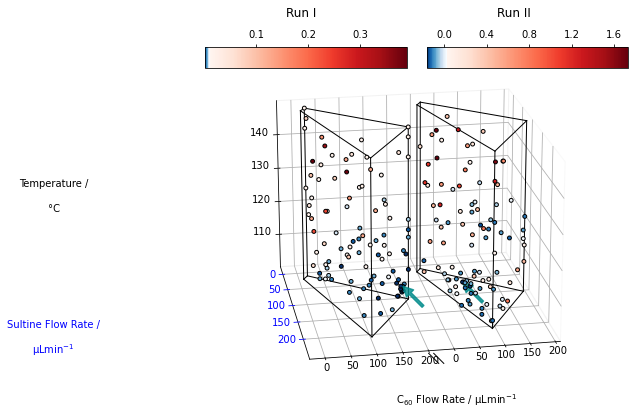

In [11]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
style = '-'
lw = 2
color = 'k'
alpha = 1

x1 = summary.xy_min / (1 + 1/summary.max_ratio)
y1 = x1 / summary.max_ratio
x2 = summary.xy_min / (1 + 1/summary.min_ratio)
y2 = x2 / summary.min_ratio
x3 = summary.xy_max / (1 + 1/summary.min_ratio)
y3 = x3 / summary.min_ratio
x4 = summary.xy_max / (1 + 1/summary.max_ratio)
y4 = x4 / summary.max_ratio
z1 = summary.z_max
z2 = summary.z_min

plot_bounds(ax, [x1,x2,x3,x4], [y1,y2,y3,y4], [z1,z2])

x1 += offset
x2 += offset
x3 += offset
x4 += offset

plot_bounds(ax, [x1,x2,x3,x4], [y1,y2,y3,y4], [z1,z2])

bwr_shifted1 = shiftedColorMap(start=df1.f.min(), midpoint=df1.f.median(), stop=df1.f.max())
bwr_shifted2 = shiftedColorMap(midpoint=df2.f.median(), start=df2.f.min(), stop=df2.f.max())
best_ind1 = df1[df1.f == df1.f.min()].index.values[0]
best_ind2 = df2[df2.f == df2.f.min()].index.values[0]

p1 = ax.scatter(df1.x1, df1.x2, df1.x3, 
                s=15, c=df1.f, cmap=bwr_shifted1, alpha=1, edgecolor='k')

p2 = ax.scatter(df2.x1, df2.x2, df2.x3, 
                s=15, c=df2.f, cmap=bwr_shifted2, alpha=1, edgecolor='k')

ax.set_xlim(-10, 510)
ax.set_ylim(-20, 250)
ax.set_zlim(101, 149)

ax.view_init(20, 80)
ax.invert_xaxis()
ax.invert_yaxis()

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

xtickpos = [0, 50, 100, 150, 200, offset + 10, offset + 60, offset + 110, offset + 160, offset + 210]
labels = ['0', '50', '100', '150', '200', '0', '50', '100', '150', '200']
ax.set_xticks(xtickpos)
ax.set_xticklabels(labels)
ax.set_yticks([0, 50, 100, 150, 200])
ax.tick_params(axis='y', colors='b', pad=-2)
ax.tick_params(axis='z', pad=-2)
ax.tick_params(axis='x', pad=-1)

for tick in ax.xaxis.get_majorticklabels():
    tick.set_verticalalignment('center')
    tick.set_horizontalalignment('center')
        
for tick in ax.yaxis.get_majorticklabels():
    tick.set_verticalalignment('bottom')
    tick.set_horizontalalignment('right')
        
for tick in ax.zaxis.get_majorticklabels():
    tick.set_verticalalignment('center')
    tick.set_horizontalalignment('right')

cbaxes = fig.add_axes([0.53, 0.81, 0.2, 0.04])
cbar = fig.colorbar(p2, cax=cbaxes, orientation='horizontal', ticks=[0, 0.4, 0.8, 1.2, 1.6])
cbaxes.xaxis.set_ticks_position('top')

cbaxes = fig.add_axes([0.31, 0.81, 0.2, 0.04])
cbar = fig.colorbar(p1, cax=cbaxes, orientation='horizontal', ticks=[0, 0.1, 0.2, 0.3])
cbaxes.xaxis.set_ticks_position('top')

fig.text(0.56, 0.15, 'C$_{60}$ Flow Rate / \u03BCLmin$^{-1}$', fontsize=10, va='center', ha='center')
fig.text(0.16, 0.3, r'Sultine Flow Rate /', fontsize=10, va='center', ha='center', color='b')
fig.text(0.16, 0.25, '\u03BCLmin$^{-1}$', fontsize=10, va='center', ha='center', color='b')
fig.text(0.16, 0.58, r'Temperature /', fontsize=10, va='center', ha='center')
fig.text(0.16, 0.53, '\u00B0C', fontsize=10, va='center', ha='center')

from matplotlib import lines
l1 = lines.Line2D([0.537, 0.547], [0.243, 0.223], transform=fig.transFigure, figure=fig, c='k', lw=1)
l2 = lines.Line2D([0.532, 0.542], [0.243, 0.223], transform=fig.transFigure, figure=fig, c='k', lw=1)
fig.lines.extend([l1, l2])
fig.canvas.draw()

x1, y1, _ = proj3d.proj_transform(df1.x1.iloc[best_ind1], df1.x2.iloc[best_ind1],
                                  df1.x3.iloc[best_ind1], ax.get_proj())

x2, y2, _ = proj3d.proj_transform(df2.x1.iloc[best_ind2], df2.x2.iloc[best_ind2],
                                  df2.x3.iloc[best_ind2], ax.get_proj())
arrow_end = (20, -20)
arrow_color = (0, 139/255, 139/255)
ax.annotate('', xy=(x1,y1), xytext=arrow_end, textcoords='offset points', 
            arrowprops=dict(ec=arrow_color, fc=arrow_color, width=2.5, lw=1.5, headwidth=10, alpha=0.8, headlength=10))

ax.annotate('', xy=(x2,y2), xytext=arrow_end, textcoords='offset points', 
            arrowprops=dict( ec=arrow_color, fc=arrow_color, width=2.5, lw=1.5, headwidth=10, alpha=0.8, headlength=10))

fig.text(0.39, 0.91, 'Run I', fontsize=12)
fig.text(0.6, 0.91, 'Run II', fontsize=12)